In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## How do the distributions look when patients of different coverages are excluded?

In [3]:
df_kir_ = pd.concat([pd.read_csv('/cellar/users/ramarty/Data/kir/components/alternate/components_four_kir_counts.csv', index_col=0),
                      pd.read_csv('/cellar/users/ramarty/Data/kir/components/tcga/components_four_kir_counts.csv', index_col=0)])
large_populations, size = [], []
for i, population in enumerate(population_dictionary.keys()):
    samples = population_dictionary_stripped[population]
    df_tmp = df_kir_.ix[samples].dropna()
    if len(df_tmp) > population_size_cutoff:
        large_populations.append(population)
        size.append(len(df_tmp))
plotting_df = pd.DataFrame({'Population': large_populations,
                            'Size': size})
plotting_df = plotting_df.sort_values('Size', ascending=False)

In [28]:
def plot_non_anchor(df_kir):
    k=20
    gene_set = nonanchor_genes
    palette = sns.color_palette("hls", len(gene_set))

    samples = population_dictionary_stripped[population]
    df_kir_tmp = df_kir.ix[samples].dropna()
    f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

    print len(samples), len(df_kir_tmp)

    for i, gene in enumerate(gene_set):
        nonanchor = df_kir_tmp[kmers[k][gene]].mean(axis=1)
        normalizer = df_kir_tmp[all_kir_kmers].mean(axis=1)

        merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
        merged.columns = ['nonanchor', 'normalizer']
        merged['normalized'] = merged['nonanchor'] / merged['normalizer']

        minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

        plt.subplot(len(gene_set), 1, i+1)
        merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
        list_normalized = merged['normalized'][:, np.newaxis]
        #kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
        #X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
        #log_dens = kde.score_samples(X_plot)
        #print np.exp(log_dens).max()
        #plot(X_plot[:, 0], np.exp(log_dens), '-')
        plt.xlim(minimum, maximum)
        plt.ylabel(gene)

    plt.show()
    plt.clf()

In [25]:
def plot_anchor(df_kir):
    gene_set = anchor_genes
    palette = sns.color_palette("hls", len(gene_set))

    samples = population_dictionary_stripped[population]
    df_kir_tmp = df_kir.ix[samples].dropna()
    f, axarr = plt.subplots(3, sharex=True, figsize=(6, 12))

    print len(samples), len(df_kir_tmp)

    for i, gene in enumerate(gene_set):
        nonanchor = df_kir_tmp[kmers[k][gene]].mean(axis=1)
        normalizer = df_kir_tmp[all_kir_kmers].mean(axis=1)

        merged = pd.merge(pd.DataFrame(nonanchor), pd.DataFrame(normalizer), left_index=True, right_index=True).drop_duplicates()
        merged.columns = ['nonanchor', 'normalizer']
        merged['normalized'] = merged['nonanchor'] / merged['normalizer']

        minimum, maximum = merged['normalized'].min(), merged['normalized'].max()

        plt.subplot(len(gene_set), 1, i+1)
        merged['normalized'].hist(bins=50, alpha=0.5, color=palette[i], normed=True)
        list_normalized = merged['normalized'][:, np.newaxis]
        #kde = KernelDensity(kernel='gaussian', bandwidth=0.08).fit(list_normalized)
        #X_plot = np.linspace(minimum, maximum, 100)[:, np.newaxis]
        #log_dens = kde.score_samples(X_plot)
        #plot(X_plot[:, 0], np.exp(log_dens), '-')
        plt.xlim(minimum, maximum)
        plt.ylabel(gene)

    plt.show()
    plt.clf()

In [26]:
population = 'TCGA_agilent'

No exclusion

3156 722


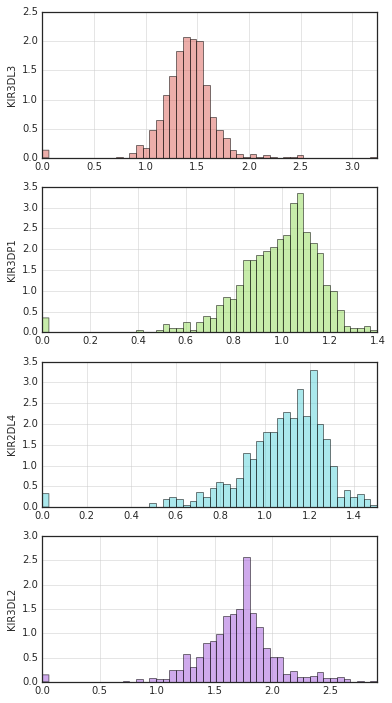

3156 722


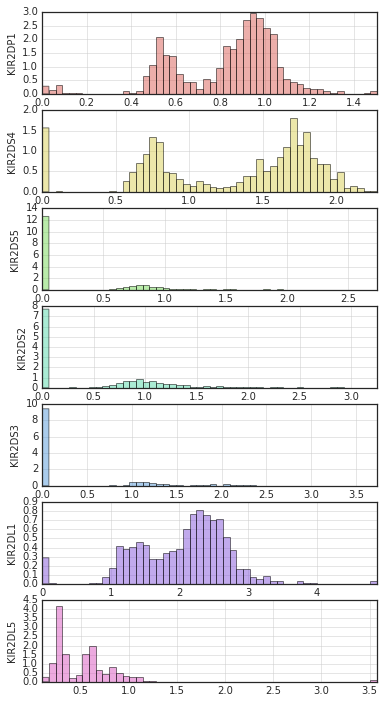

In [29]:
plot_anchor(df_kir_)
plot_non_anchor(df_kir_)

Very low exclusion

3156 708


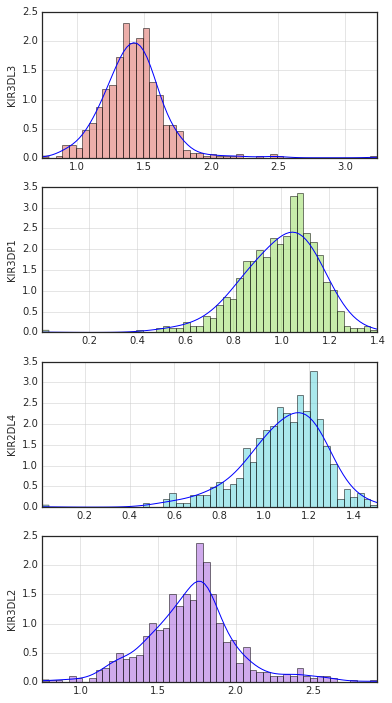

3156 708
2.22497216544
1.24937494255
3.40587585695
2.4637154111
3.47335124436
0.813429160528
2.19647836429


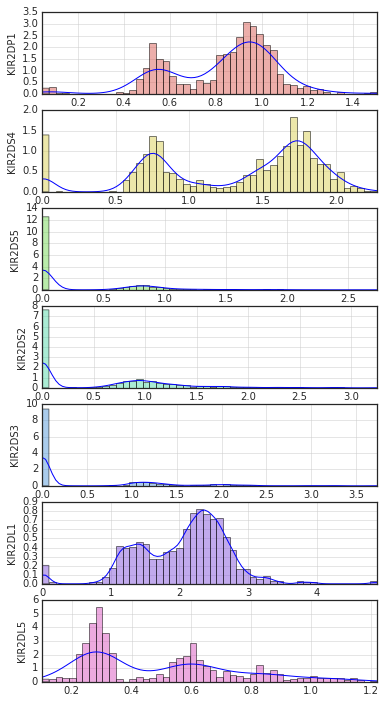

In [20]:
df_kir = df_kir_.ix[[x for x in df_kir_.index if x not in very_low_coverage_patients]]
plot_anchor(df_kir)
plot_non_anchor(df_kir)

Low exclusion

3156 707


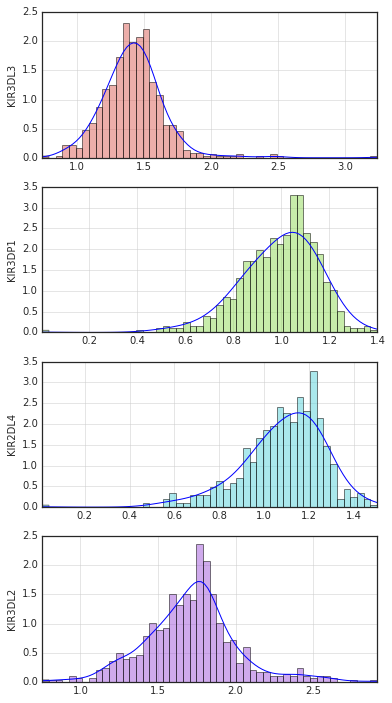

3156 707
2.22108063378
1.24581749461
3.40364053793
2.46014672214
3.47121061174
0.811619543602
2.19401684276


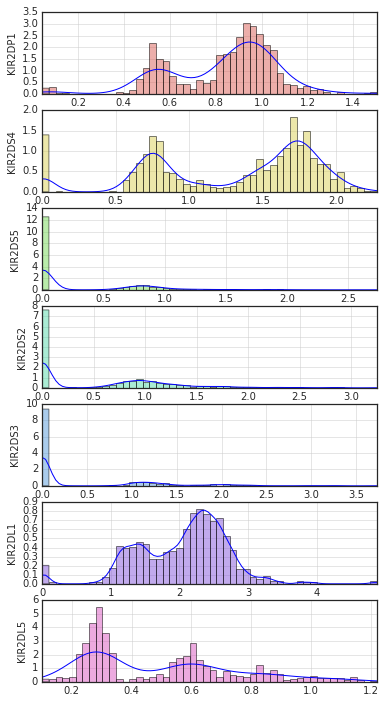

In [21]:
df_kir = df_kir_.ix[[x for x in df_kir_.index if x not in low_coverage_patients]]
plot_anchor(df_kir)
plot_non_anchor(df_kir)

Sorta low exclusion

3156 626


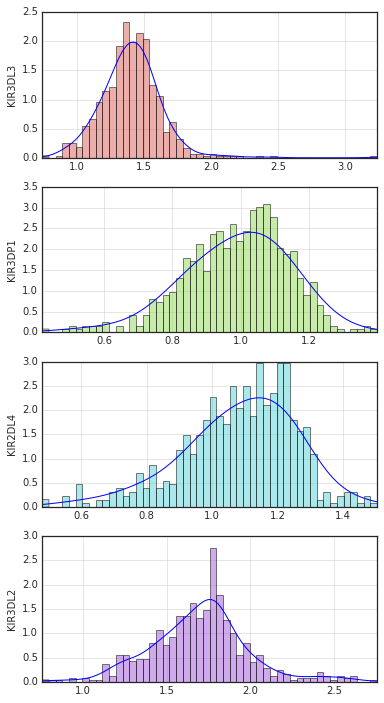

3156 626
2.31919273258
1.22060098996
3.35496337516
2.52804686504
3.37047243024
0.845557830423
2.08267024765


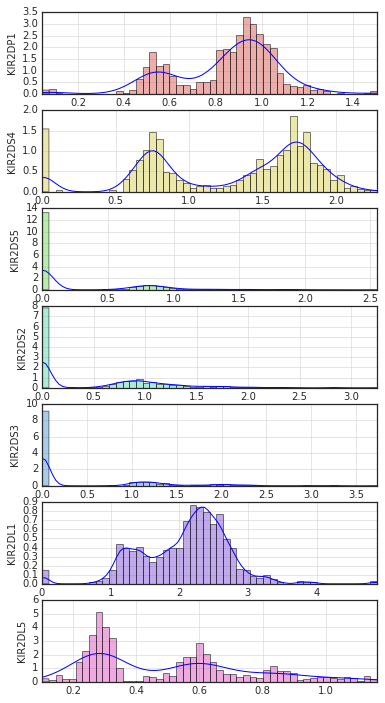

In [22]:
df_kir = df_kir_.ix[[x for x in df_kir_.index if x not in sorta_low_coverage_patients]]
plot_anchor(df_kir)
plot_non_anchor(df_kir)